In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
import joblib

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
X = df.drop("Name", axis=1)

In [4]:
X.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


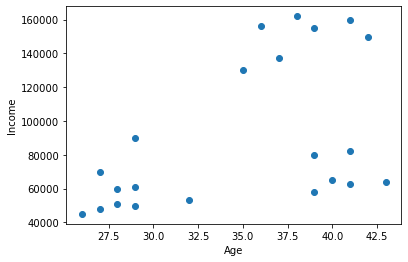

In [5]:
plt.scatter(X.Age, X.Income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.savefig("scatter.png")

In [6]:
model = KMeans(n_clusters = 3)

model.fit(X)

KMeans(n_clusters=3)

In [7]:
y_pred = model.predict(X)
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [8]:
X['cluster'] = y_pred
X.head()

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


In [9]:
df1 = X[X.cluster ==0]

df2 = X[X.cluster == 1]

df3 = X[X.cluster == 2]

In [10]:
df1


,Age,Income,cluster
2,29,61000,0
3,28,60000,0
11,26,45000,0
12,27,48000,0
13,28,51000,0
14,29,49500,0
15,32,53000,0
16,40,65000,0
17,41,63000,0
18,43,64000,0


In [11]:
df2

,Age,Income,cluster
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1
10,37,137000,1


In [12]:
df3

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
19,39,80000,2
20,41,82000,2


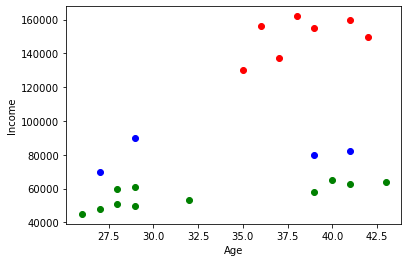

In [13]:
plt.scatter(df1.Age, df1.Income, color = 'green')
plt.scatter(df2.Age, df2.Income, color = 'red')
plt.scatter(df3.Age, df3.Income, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income')

plt.savefig('scatter2.png')

In [14]:
model.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [15]:
center_x = model.cluster_centers_[:,0]
center_y = model.cluster_centers_[:,1]

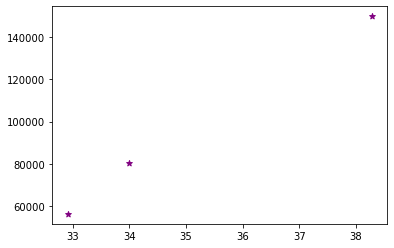

In [16]:
plt.scatter(center_x,center_y, color='purple', marker='*')

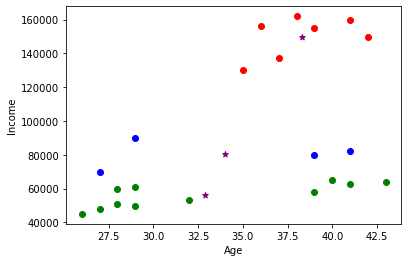

In [17]:
plt.scatter(df1.Age, df1.Income, color = 'green')
plt.scatter(df2.Age, df2.Income, color = 'red')
plt.scatter(df3.Age, df3.Income, color = 'blue')
plt.scatter(center_x,center_y, color='purple', marker='*')
plt.xlabel('Age')
plt.ylabel('Income')

plt.savefig('scatter2.png')

In [18]:

scaler = MinMaxScaler()

scaler.fit(X[['Income']])

X.Income = scaler.transform(X[['Income']])

X.head()

,Age,Income,cluster
0,27,0.213675,2
1,29,0.384615,2
2,29,0.136752,0
3,28,0.128205,0
4,42,0.897436,1


In [19]:
scaler.fit(X[['Age']])

X.Age = scaler.transform(X[['Age']])

X.head()

,Age,Income,cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [20]:
X = X.drop('cluster', axis = 1)
X.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


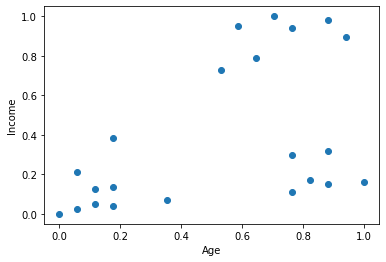

In [21]:
plt.scatter(X.Age, X.Income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.savefig("scatter3.png")

In [22]:
model_new = KMeans(n_clusters = 3)

model_new.fit(X)

KMeans(n_clusters=3)

In [23]:
y_pred = model_new.predict(X)

In [24]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [25]:
X.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [26]:
X['Cluster'] = y_pred

X.head()

,Age,Income,Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


In [27]:
model_new.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [28]:
center_x = model_new.cluster_centers_[:,0]
center_y = model_new.cluster_centers_[:,1]

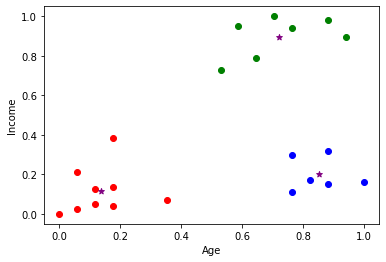

In [29]:
df1 = X[X.Cluster ==0]

df2 = X[X.Cluster == 1]

df3 = X[X.Cluster == 2]


plt.scatter(df1.Age, df1.Income, color = 'green')
plt.scatter(df2.Age, df2.Income, color = 'red')
plt.scatter(df3.Age, df3.Income, color = 'blue')
plt.scatter(center_x,center_y, color='purple', marker='*')
plt.xlabel('Age')
plt.ylabel('Income')

plt.savefig('scatter5.png')

In [30]:
sse = []

for k in range(1,10):
    model = KMeans(n_clusters = k)
    model.fit(X[['Age','Income']])
    sse.append(model.inertia_)

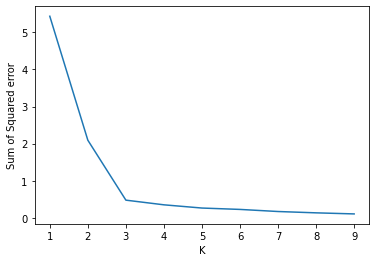

In [31]:
x = range(1,10)
y=sse

plt.xlabel("K")
plt.ylabel("Sum of Squared error")
plt.plot(x,y)
plt.savefig('k_elbow_plot.png')

In [34]:
joblib.dump(model, 'kmeans_classifier.pkl')

['kmeans_classifier.pkl']